In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [2]:
data =pd.read_csv('Weather_data.csv')
data

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
5,19961101-17:00,Smoke,12.0,0,0,NaN,56.0,NaN,1011.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
6,19961101-18:00,Smoke,13.0,0,0,NaN,60.0,NaN,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
7,19961101-19:00,Smoke,13.0,0,0,NaN,60.0,NaN,-9999.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
8,19961101-20:00,Smoke,13.0,0,0,NaN,68.0,NaN,-9999.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN
9,19961101-21:00,Smoke,13.0,0,0,NaN,68.0,NaN,1010.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN


In [3]:
d_data=data.copy()
d_data['datetime_utc']=pd.to_datetime(d_data['datetime_utc'])
d_data=d_data.set_index('datetime_utc')
d_data.head()

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [4]:
d_data.columns

Index([' _conds', ' _dewptm', ' _fog', ' _hail', ' _heatindexm', ' _hum',
       ' _precipm', ' _pressurem', ' _rain', ' _snow', ' _tempm', ' _thunder',
       ' _tornado', ' _vism', ' _wdird', ' _wdire', ' _wgustm', ' _windchillm',
       ' _wspdm'],
      dtype='object')

In [5]:
d_data[' _pressurem']=d_data[' _pressurem'].replace(to_replace = -9999.0, value = np.nan)
d_data[[' _dewptm', ' _hum',' _pressurem', ' _tempm',' _vism',' _wspdm']]=d_data[[' _dewptm', ' _hum',' _pressurem', ' _tempm',' _vism',' _wspdm']].fillna(method='backfill')

In [6]:
new_data=d_data.drop([' _conds',' _fog', ' _hail', ' _heatindexm',' _precipm', ' _rain', ' _snow', ' _thunder',' _tornado',  ' _wdird', ' _wdire', ' _wgustm', ' _windchillm'],axis=1)
new_data

,_dewptm,_hum,_pressurem,_tempm,_vism,_wspdm
datetime_utc,,,,,,
1996-11-01 11:00:00,9.0,27.0,1010.0,30.0,5.0,7.4
1996-11-01 12:00:00,10.0,32.0,1010.0,28.0,2.0,0.0
1996-11-01 13:00:00,11.0,44.0,1010.0,24.0,2.0,0.0
1996-11-01 14:00:00,10.0,41.0,1010.0,24.0,2.0,0.0
1996-11-01 16:00:00,11.0,47.0,1011.0,23.0,1.2,0.0
1996-11-01 17:00:00,12.0,56.0,1011.0,21.0,0.8,0.0
1996-11-01 18:00:00,13.0,60.0,1010.0,21.0,0.8,0.0
1996-11-01 19:00:00,13.0,60.0,1010.0,21.0,2.0,9.3
1996-11-01 20:00:00,13.0,68.0,1010.0,19.0,2.0,9.3


In [7]:
new_data=new_data.resample('D').mean()
new_data

,_dewptm,_hum,_pressurem,_tempm,_vism,_wspdm
datetime_utc,,,,,,
1996-11-01,11.666667,52.916667,1010.000000,22.333333,1.983333,4.491667
1996-11-02,10.458333,48.625000,1009.833333,22.916667,3.258333,7.800000
1996-11-03,12.041667,55.958333,1010.500000,21.791667,2.304167,5.020833
1996-11-04,10.222222,48.055556,1011.333333,22.722222,2.188889,1.855556
1996-11-05,8.200000,29.400000,1011.800000,27.800000,3.900000,10.020000
1996-11-06,9.062500,47.875000,1011.812500,21.937500,2.900000,4.756250
1996-11-07,9.458333,48.000000,1013.416667,21.750000,2.704167,3.254167
1996-11-08,8.125000,45.791667,1014.708333,21.041667,2.550000,2.325000
1996-11-09,7.772727,47.181818,1013.863636,19.909091,2.727273,4.300000


In [8]:
new_data.index

DatetimeIndex(['1996-11-01', '1996-11-02', '1996-11-03', '1996-11-04',
               '1996-11-05', '1996-11-06', '1996-11-07', '1996-11-08',
               '1996-11-09', '1996-11-10',
               ...
               '2016-11-21', '2016-11-22', '2016-11-23', '2016-11-24',
               '2016-11-25', '2016-11-26', '2016-11-27', '2016-11-28',
               '2016-11-29', '2016-11-30'],
              dtype='datetime64[ns]', name='datetime_utc', length=7335, freq='D')

In [11]:
ts=new_data[' _tempm']
ts=ts.fillna(method='ffill')


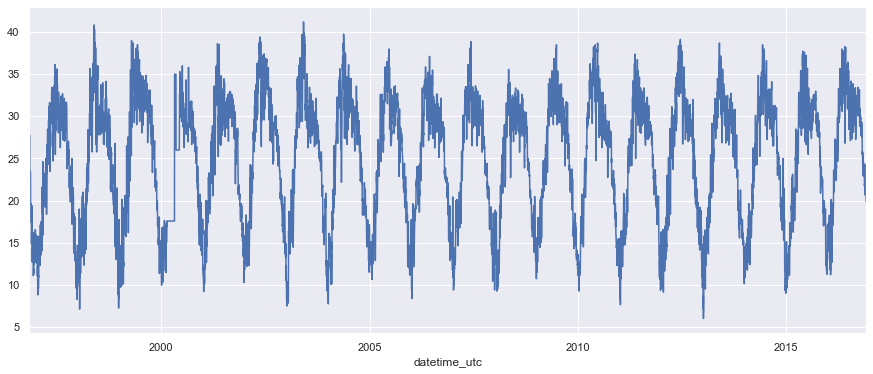

In [14]:
ts.plot(figsize=(15,6))
plt.show()

# The time-series has seasonality pattern

In [27]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [30]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(ts,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:68718.9331714588
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:60063.322851904035
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:39381.70272053118
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:39153.64884300006
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:39354.20084995362
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:39209.44034194724
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:39119.146945308414
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:39155.78596742186


C:\Users\vivek\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:59257.06430471114
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:51699.98314114285
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:35385.29000146423
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:34813.66236229231
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:35344.360494479624
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:34858.2428960478
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:34754.6651277814
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:34744.400565839365
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:28833.038807050398
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:28775.88089915889
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:33816.76781750959
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:28802.54936814839
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:28779.451855442847
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:28777.87871013261
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:31746.412726696137
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:28801.242726464992
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:28643.633327909592
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:28581.78561925218
ARIMA

C:\Users\vivek\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:32912.198152572935
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:28710.72038647613
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:28773.301232527567
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:28775.27366743474
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:31116.78218516869
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:28708.16376587672
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:28643.78523263079
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:28587.606752111056
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:32906.733511820974
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:28554.0374128369
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:28592.111919467516
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:28589.45420592348
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:31086.581458906912
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:28552.86980522225
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:28693.993910665726
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:28638.298556883936
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:33683.4007591431
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:28664.11336715588
ARIM

The above output suggests that SARIMAX(1, 1, 1)x(0, 0, 1, 12) yields the lowest AIC value of 28267.73 . Therefore we should consider this to be optimal option.

In [31]:
model = sm.tsa.statespace.SARIMAX(ts,order=(1, 1, 1),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6078      0.019     32.289      0.000       0.571       0.645
ma.L1         -0.8202      0.015    -55.978      0.000      -0.849      -0.792
ma.S.L12       0.0152      0.011      1.447      0.148      -0.005       0.036
sigma2         2.7806      0.028    100.369      0.000       2.726       2.835


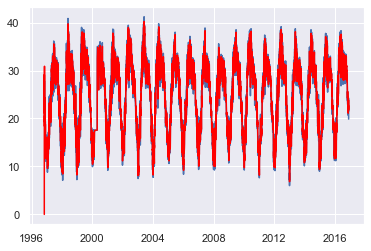

In [32]:
plt.plot(ts)
plt.plot(results.fittedvalues, color='red')

# INPUT START AND END DATE

In [42]:
start_index = pd.to_datetime('2016-11-01')
end_index = pd.to_datetime('2016-11-30')
forecast = results.predict(start=start_index, end=end_index , dynamic=False)
for i in forecast:
    print(i)

25.035174622127656
24.813041846664674
24.23887172086971
25.61673476499305
25.00323439367626
23.61740039785159
23.37056709850034
24.557117685468715
23.906568247733205
23.313588218897053
23.647844487578386
23.945467921282717
23.640729678001687
24.210805562853764
23.512770295333784
22.581854357147233
22.130864849317376
22.202335108540286
22.025496914721526
21.107127535877943
22.271508672833185
21.721688066004276
22.509833447643615
22.70729920687409
21.637118246580773
23.293057680303683
23.88633793050606
23.445116456359344
22.555721945799977
21.86861016127005


# using deep learning

Traditionally, time series forecasting has been dominated by linear methods because they are well understood and effective on many simpler forecasting problems.

Deep learning neural networks are able to automatically learn arbitrary complex mappings from inputs to outputs and support multiple inputs and outputs.